In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

In [22]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('C'), ['GND', '1'])
        
phi = QVariable('φ')
phixH = QVariable('φxH')
phixE = QVariable('φxE')
#phix2 = QVariable('φx2')
phi.create_grid(32, 1)
FQ3JJ.add_variable(phi)
FQ3JJ.add_variable(phixH)
FQ3JJ.add_variable(phixE)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2'], 
                       ['φ', 'φxH', 'φxE'], 
                       np.asarray([[0,0,1],[1,0,0],[0,1,1]]))

#EjEc_ratio = 80
flux_steps = 1
voltage_steps = 128
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((voltage_steps,4), dtype=np.float)

Ej = 2e8 * 5
#Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
Ec = 2e8
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C').set_capacitance(2/Ec)
phixH_value = np.pi*2/3

for UxE_id, UxE_value in enumerate(np.linspace(-2, 2, voltage_steps)/2*Ec):
#for phix_id, phix_value in enumerate(np.linspace(-0.5*np.pi, 0.5*np.pi, flux_steps)):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phixH.set_parameter(phixH_value, 0)
    phixE.set_parameter(0, UxE_value)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[UxE_id, :] = eigenenergies
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

<ipython-input-22-7efaedbdc9ab>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[UxE_id, :] = eigenenergies


In [23]:
FQ3JJ.capacitance_matrix_legendre_transform()

array([[ 1.e+08, -0.e+00,  1.e+00],
       [-0.e+00,  0.e+00,  0.e+00],
       [ 1.e+00,  0.e+00,  1.e-08]])

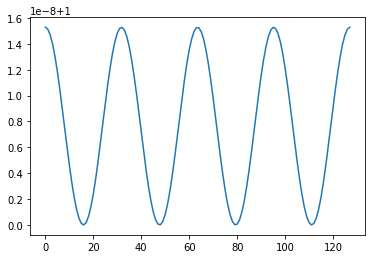

In [26]:
plt.plot((energies[:,1]-energies[:,0]))
# plt.plot((energies[:,2]-energies[:,1]))
# plt.plot((energies[:,3]-energies[:,2]))

Text(0.5, 1.0, '$E_J$ / $E_C$ = 0.1')

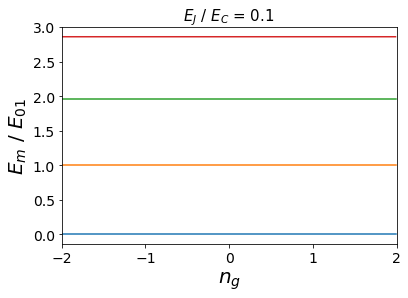

In [24]:
energy_norm = energies
e_01 = np.min(energies[:,1]-energies[:,0])
energy_norm /= e_01
plt.plot(np.arange(-2, 2, 0.0314), energy_norm - np.min(energy_norm[:,0]))
plt.ylabel('$E_m$ / $E_{01}$', fontsize=20)
plt.xlabel('$n_g$', fontsize=20)
plt.xlim(0,2)
plt.xticks([-2,-1,0,1,2], fontsize=14)
plt.yticks(fontsize=14)
plt.title('$E_J$ / $E_C$ = 0.1', fontsize=15)

In [32]:
gate = np.arange(-4, 0, 0.05)
print(gate)
f01 = 4 + gate

[-4.   -3.95 -3.9  -3.85 -3.8  -3.75 -3.7  -3.65 -3.6  -3.55 -3.5  -3.45
 -3.4  -3.35 -3.3  -3.25 -3.2  -3.15 -3.1  -3.05 -3.   -2.95 -2.9  -2.85
 -2.8  -2.75 -2.7  -2.65 -2.6  -2.55 -2.5  -2.45 -2.4  -2.35 -2.3  -2.25
 -2.2  -2.15 -2.1  -2.05 -2.   -1.95 -1.9  -1.85 -1.8  -1.75 -1.7  -1.65
 -1.6  -1.55 -1.5  -1.45 -1.4  -1.35 -1.3  -1.25 -1.2  -1.15 -1.1  -1.05
 -1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
